# Projet Numérique

Les équations de Lotka-Volterra, ou "modèle proie-prédateur", sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un prédateur et sa proie interagissent dans un milieu commun.  Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s'écrivent de la manière suivante :
$$
\left\{ \begin{matrix}
\dot{x}_1 &= x_1(\alpha -\beta x_2) \\
\dot{x}_2 &= -x_2(\gamma - \delta x_1)
\end{matrix} \right.
$$
où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.

## Preambule

<br>

In [3]:
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

In [35]:
alph = 2/3
bet =  4/3
gam = 1
delt = 1

## Question 1
Donner une interprétation physique à chaque terme de la dynamique. 
Montrer qu'il existe deux points d'équilibre $(0,0)$ et $\bar{x}\in \mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$. Que peut-on dire de leur stabilité à ce stade ?


1- Interprétation des termes de la dynamique

$x_1$ désigne les proies,

$x_2$ désigne les prédateurs,

$\alpha$ désigne le taux de reproduction des proies,

$\beta$ désigne le taux de disparition (mort) des proies due aux prédateurs,

$\gamma$ désigne le taux de disparition des prédateurs en l'absence de proies,

$\delta$ désigne le taux de reproduction des prédateurs grâce aux proies mangées.

2- Points d'équilibre

Un point d'équilibre correspond à un état où aucune des populations n'évolue.

Ceci équivaut au système : $\begin{cases}0 = x_1(\alpha - \beta x_2)\\0 = -x_2(\gamma-\delta x_1)\end{cases}$

Dont il résulte uniquement 2 solutions : $\begin{cases}x_1 = 0\\x_2 = 0\end{cases}$ et $\bar{x} = \begin{cases}x_1 = \frac{\gamma}{\delta}\\x_2 = \frac{\alpha}{\beta}\end{cases}$

Les paramètres de la dynamique étant tous strictement positifs, on a $\bar x \in \mathbb{R_{>0}}\times \mathbb{R_{>0}}$.

3- Stabilité des points d'équilibre

On pose $f(x_1,x_2) = (x_1(\alpha - \beta x_2),- x_2(\gamma - \delta x_1))$. $f$ est dérivable par rapport à ses deux variables, on peut donc calculer sa jacobienne:

$ J_f(x_1,x_2) = \begin{pmatrix} \alpha - \beta x_2 & - \beta x_1 \\ \delta x_2 & - \gamma + \delta x_1 \end{pmatrix} $

Pour le premier point d'équilibre $(0,0)$ : $J_f(0,0) = \begin{pmatrix} \alpha & 0 \\ 0 & - \gamma \end{pmatrix}$

Or, $\alpha > 0$ et $-\gamma < 0$ sont les valeurs propres de cette matrice, et $\alpha$ est à partie réelle strictement positive, on en déduit que $(0,0)$ n'est pas localement (et donc encore moins globalement) stable d'après le cours.

Pour le deuxième point d'équilibre $\bar{x}$ : $J_f(\bar{x}) = \begin{pmatrix} 0 & - \beta \frac{\gamma}{\delta} \\ \delta \frac{\alpha}{\beta} & 0 \end{pmatrix}$

Son polynôme caractéristique est $p_{J_f(\bar{x})}(x) = \begin{vmatrix} x &  \beta \frac{\gamma}{\delta} \\ - \delta \frac{\alpha}{\beta} & x \end{vmatrix} = x^2 + \alpha\gamma$

Les racines de ce polynôme sont $\pm i\sqrt{\alpha\gamma}$. Or celles-ci sont à partie réelle nulle, on ne peut donc pas déterminer la stabilité locale ou globale de $\bar{x}$ pour l'instant.


## Question 2
À l'aide des fonctions `meshgrid` et `quiver`, visualiser graphiquement le champ de vecteurs. 
Intuiter le comportement des solutions. 
On pourra aussi utiliser `streamplot` pour visualiser le portrait de phase.

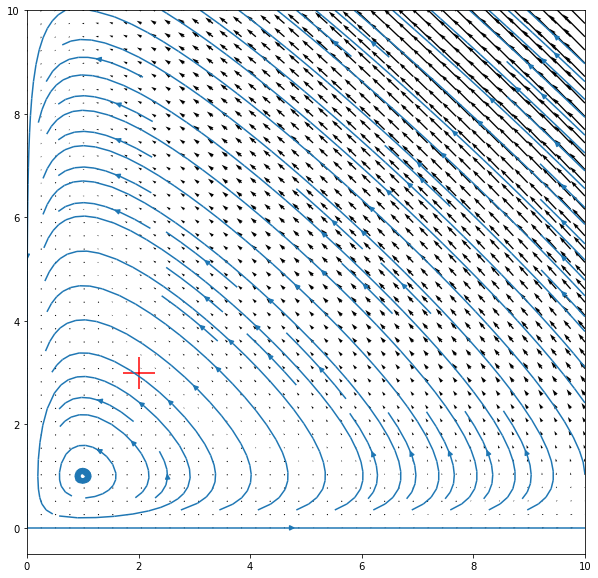

In [5]:

X1=np.linspace(0,10,40)
X2=np.linspace(0,10,40)
a=1
b=1
c=1
d=1
def lv(t,X):
    return np.array([X[0]*(a-b*X[1]),-X[1]*(c-d*X[0])])
def lvq(X):
    return lv(0,X)
X,Y=np.meshgrid(X1,X2)
#plt.scatter(X,Y,s=2)
Vx,Vy=lvq(np.array([X,Y]))   
xbar = [2,3]
plt.scatter(xbar[0],xbar[1],s=1000,c='r',marker='+')
plt.quiver(X,Y,Vx,Vy)
plt.streamplot(X,Y,Vx,Vy)

## Question 3
Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans  $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ reste dans $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ sur son ensemble de définition.

Démontrons par l'absurde que toute solution initialisée dans $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$  reste dans $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$  sur son ensemble de définition.

Soient $x_{10} = x_1(0) > 0$ et $x_{20} = x_2(0) > 0$ et $x_0 = (x_{10},x_{20}) \in \mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ 

Supposons que $x_1$ ou $x_2$ s'annule (obligatoire pour que $x_1$ ou $x_2$ devienne négatif, d'après le théorème des valeurs intermédiaires).

Si c'est $x_1$, alors $\exists s \in \mathbb{R}$ tel que $x_1(s) = 0$ et $x_2(s) = x_{2s}$.

$\forall t>s, x_1 = 0$ et $\dot{x_2} = -\gamma x_2$.

D'après le théorème de Cauchy-Lipschitz, ce schéma admet une unique solution maximale $x(t) \in \mathbb{R^2}$. Or, la fonction $g : t \mapsto (0,x_{2s}e^{-\gamma(t-s)})$ définie sur $\mathbb{R}$ est solution de ce schéma. D'après le théorème précédent, elle est unique et donc x = g. En conséquence, $x_{10}=0$, ce qui est en contradiction avec notre hypothèse initiale. Donc il est absurde de supposer que $x_1$ puisse s'annuler (ou devenir négatif). On peut réaliser la même démonstration pour $x_2$.

En conclusion, lorsque $x_0 \in \mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ , $x$ reste dans $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$  pendant toute son évolution.

<br>

## Question 4
On considère la fonction
$$
H(x_1,x_2) = \delta x_1 - \gamma \ln x_1 + \beta x_2 - \alpha \ln x_2  
$$
définie sur $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$.
Calculer la dérivée de $H$ le long des solutions initialisées dans $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$. En déduire que toute solution maximale initialisée dans $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$ est définie sur $\mathbb{R}$ et que $\bar{x}$ est stable.

1- Calcul de la dérivée

On utilise la formule de la dérivation en chaîne:

$\begin{align}
\frac{d}{dt}H(x(t))  &=   \delta \dot{x_1} - \gamma \frac{\dot{x_1}}{x_1} + \beta \dot{x_2} - \alpha \frac{\dot{x_2}}{x_2}\\
& =   \dot{x_1}(\delta - \frac{\gamma}{x_1}) + \dot{x_2}(\beta - \frac{\alpha}{x_2})\\
& =   x_1 (\alpha - \beta x_2)(\delta - \frac{\gamma}{x_1}) - x_2 (\gamma - \delta x_1)(\beta - \frac{\alpha}{x_2})\\
& =   (\delta x_1 - \gamma)(\alpha - \beta x_2) - (\alpha - \beta x_2)(\delta x_1 - \gamma)\\ 
& =   0\end{align}$

On obtient donc que $H(x(t))$ est une fonction constante du temps, tout au long de l'évolution du nombre de proies et de prédateurs, la quantité $H$ se conserve.

2- Domaine maximal d'existence

On sait que notre solution maximale $x(t)$ est définie sur un intervalle ouvert de la forme $]t_m^{-},t_m^{+}[$ avec $t_m^{-}$ et $t_m^{+}$ finis ou infinis. Supposons par exemple que $t_m^{-}$ est fini. Alors, d'après le théorème du domaine maximal d'existence, $\lim_{t \to t_m^{-}} \| x(t) \| = +\infty$.

Or, on sait que $H(x_1,x_2)$ est continue de $\mathbb{R}^2$ dans $\mathbb{R}$. De plus, H et $\|(x_1,x_2)\|$ se comportent de la même manière en $+\infty$, on a lorsque $\|(x_1,x_2)\| \to +\infty$, $H(x_1,x_2) \to + \infty$ car $\alpha, \beta, \gamma$ et $\delta$ sont positifs.

Or, la courbe de niveau $H(x(t)) = H(x_0)$ est compacte, d'où $x(t)$ est borné car évoluant dans un compact. Ainsi $\|(x_1,x_2)\| \to +\infty$ et donc $H(x_1,x_2) \to + \infty$ sont impossible.

On en déduit donc que $t_m^{-}$ n'est pas fini, même conclusion pour $t_m^{+}$.
Ainsi, toute solution initialisée sur $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ est définie sur $\mathbb{R}$.

<br>

## Question 5
Représenter les courbes de niveau de $H$. Qu'en conclue-t-on sur le comportement des solutions ?

On souhaite maintenant simuler numériquement les trajectoires.

In [6]:
 def H(x1, x2):
    h = delt*x1 - gam*np.log(x1) + bet*x2 - alph*np.log(x2)
    return h

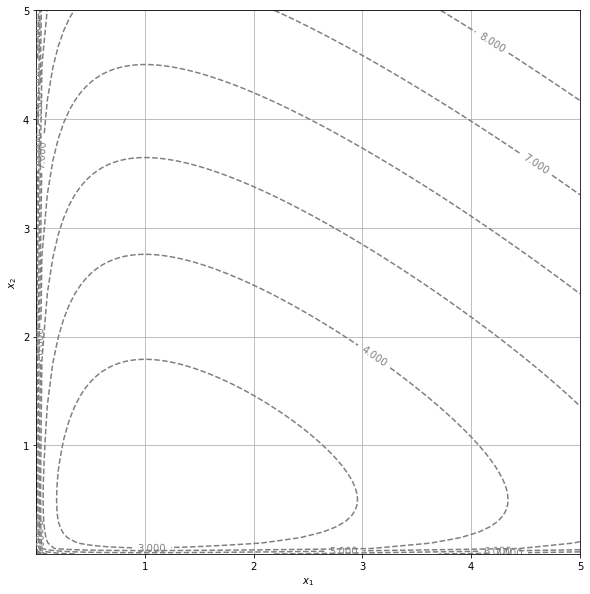

In [7]:
 display_contour(H,
                x=np.linspace(0.001, 5.0, 100), 
                y=np.linspace(0.001, 5.0, 100),
                levels=10)

<br>

## Question 6
Coder une fonction du type :

In [9]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = [t0]
    x = [x0]
    while t[-1] < tf:
        x.append(x[-1] + dt*f(t[-1], x[-1]))
        t.append(t[-1] + dt)
    return t, x


prenant en entrée une fonction $f:\mathbb{R} \times \mathbb{R}^n \to \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d'Euler explicite appliqué à $\dot{x}=f(t,x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$ tend vers 0. Comment visualiser graphiquement l'ordre de convergence ?

On va venir tester notre fonction sur l'equation differentielle regissant le comportement d'un circuit RC serie. 

En posant $\tau$ = RC et U(t) la tension aux bornes du condensateur on a une equation differentielle de la forme:

$\frac{dU}{dt} + \frac{U(t)}{\tau}$ = 0

En prenant comme condition initiale un condensateur chargé dont on avait mesuré E la tension initiale a ses bornes on obtient alors la tension suivante lors de la decharge:

U(t) = E $e^{-\frac{t}{\tau}}$

On defini la fonction f liée a cette equation differentielle:

In [45]:
tau = 10**(-1)
E = 10

In [46]:
def g(t,u):
    return -u/tau

In [47]:
def u(t):
    return E*np.exp(-t/tau)

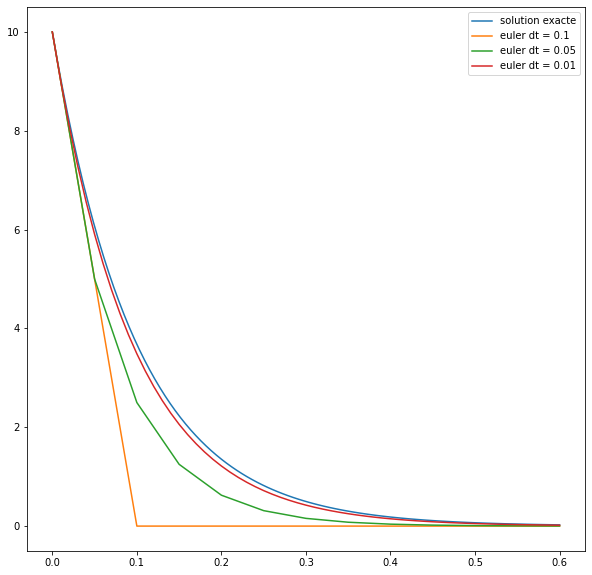

In [48]:
t = np.linspace(0,0.6,100)
plt.plot(t, u(t), label ="solution exacte")


x1,y1 = solve_euler_explicit(g, E, 1/10, 0, 0.6)
plt.plot(x1,y1, label = "euler dt = 0.1")

x2,y2 = solve_euler_explicit(g, E, 1/20, 0, 0.6)
plt.plot(x2,y2, label = "euler dt = 0.05")

x3,y3 = solve_euler_explicit(g, E, 1/100, 0, 0.6)
plt.plot(x3,y3, label = "euler dt = 0.01")

plt.legend()

plt.show()

<br>

## Question 7
Utiliser le schéma d'Euler explicite pour simuler les équations de Lotka-Volterra.
Que constate-t-on en temps long ? Cette résolution vous semble-t-elle fidèle à la réalité ?
On pourra tracer l'évolution de la fonction $H$.

[]

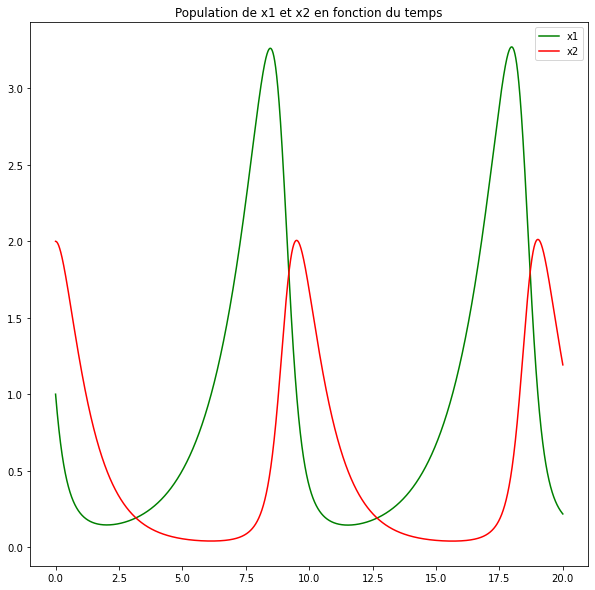

In [49]:
def f(t,X) :
    x,y = X[0],X[1]
    return np.array([x*(alph-bet*y),-y*(gam-delt*x)]) 

T,X = solve_euler_explicit(f,np.array([1,2]),0.001,0,20)

plt.plot(T,[e[0] for e in X], color = 'green', label = "x1")
plt.plot(T,[e[1] for e in X], color = 'red', label = "x2")
plt.legend()
plt.title("Population de x1 et x2 en fonction du temps")
plt.plot()

<br>

On regarde ce que cela donne en temps long:

[]

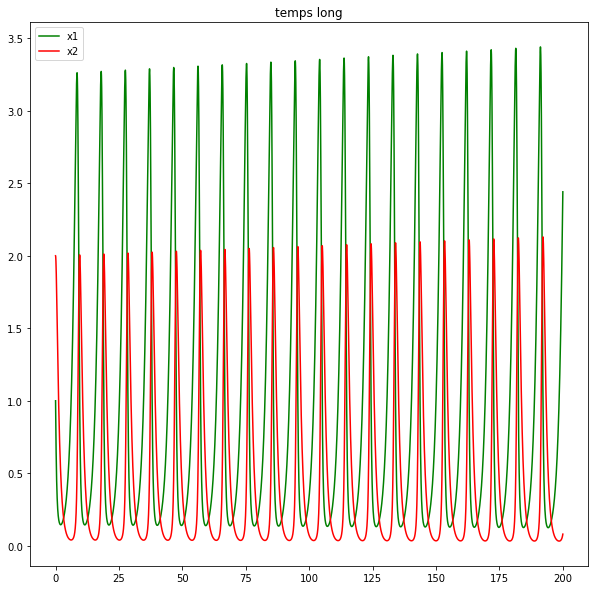

In [39]:
T,X = solve_euler_explicit(f,np.array([1,2]),0.001,0,200)

plt.plot(T,[e[0] for e in X], color = 'green', label = "x1")
plt.plot(T,[e[1] for e in X], color = 'red', label = "x2")
plt.legend()
plt.title("temps long")
plt.plot()

On trace H en fonction du temps

[]

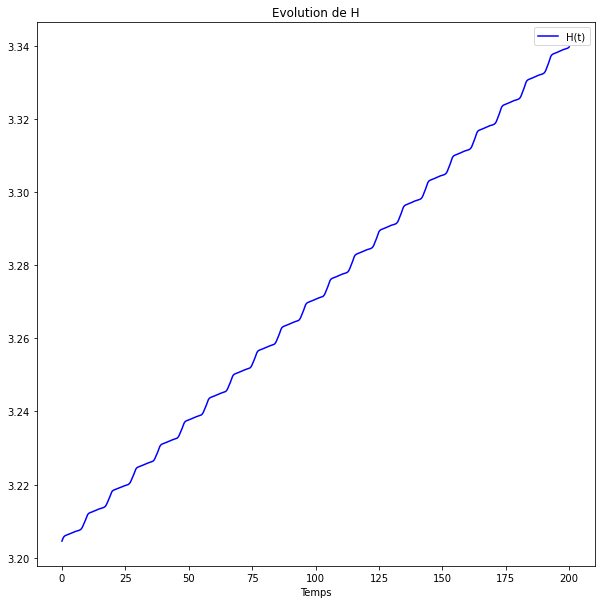

In [40]:
Y = []
for i in range(0,len(T)):
    Y.append(H(X[i][0],X[i][1]))
plt.plot(T,Y, color='b', label = 'H(t)')
plt.legend()
plt.title("Evolution de H")
plt.xlabel("Temps")
plt.plot()

## Question 8
Coder maintenant une fonction du type :

In [69]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
   
    eps = 10**(-6)
    
    T,X = solve_euler_explicit(f, x0, dt, t0, tf)
    
     
    N = lambda X : sum(e**2 for e in X)**(0.5)   #la norme 
    
    for i in range(1,len(X)) :
        t, x0 = T[i], X[i] 
        
        
        def F(u):
            return X[i-1] + dt*f(t,u)
       
        x = x0
        x1 = F(x0)
        
        reussi = False
        
        for k in range(1,itermax) :
            if N((x1-x)/x0)<eps :
                X[i]=x1
                reussi = True
                break
            x, x1 = x1, F(x1)
            
        if not reussi :
            raise ValueError("No convergence in {} steps".format(itermax))
    return T,X
    


donnant la solution d'un schéma d'Euler implicite appliqué à $\dot{x}=f(t,x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?

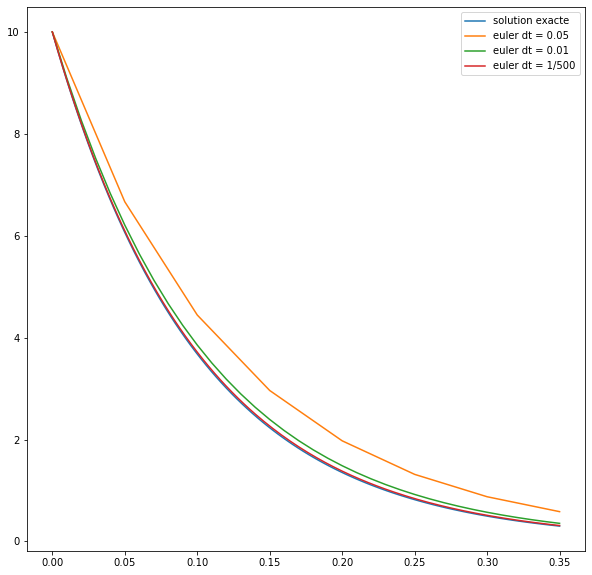

In [74]:
t = np.linspace(0,0.35,100)
plt.plot(t, u(t), label ="solution exacte")


x2,y2 = solve_euler_implicit(g, np.array([E]), 1/20, 0, 0.35, itermax = 100)
plt.plot(x2,y2, label = "euler dt = 0.05")

x3,y3 = solve_euler_implicit(g, np.array([E]), 1/100, 0, 0.35, itermax = 100)
plt.plot(x3,y3, label = "euler dt = 0.01")

x1,y1 = solve_euler_implicit(g, np.array([E]), 1/500, 0, 0.35, itermax = 100)
plt.plot(x1,y1, label = "euler dt = 1/500")

plt.legend()

plt.show()

Maintenant les equations de lotka-volterra

[]

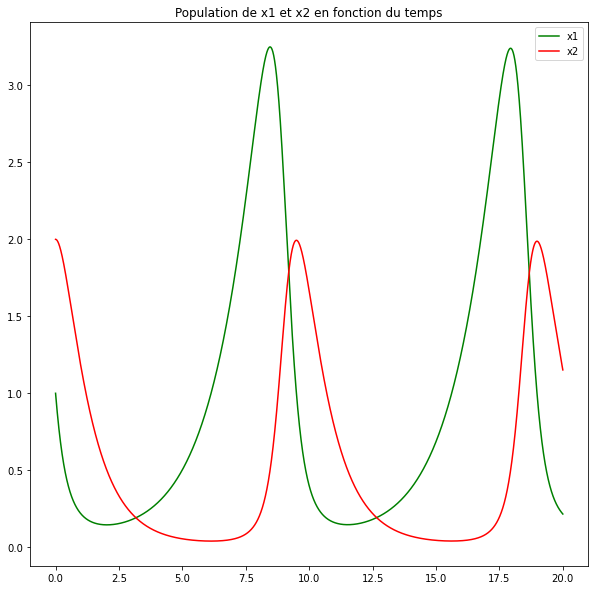

In [75]:

T,X = solve_euler_implicit(f,np.array([1,2]),0.001,0,20)

plt.plot(T,[e[0] for e in X], color = 'green', label = "x1")
plt.plot(T,[e[1] for e in X], color = 'red', label = "x2")
plt.legend()
plt.title("Population de x1 et x2 en fonction du temps")
plt.plot()

Pour un temps long:

[]

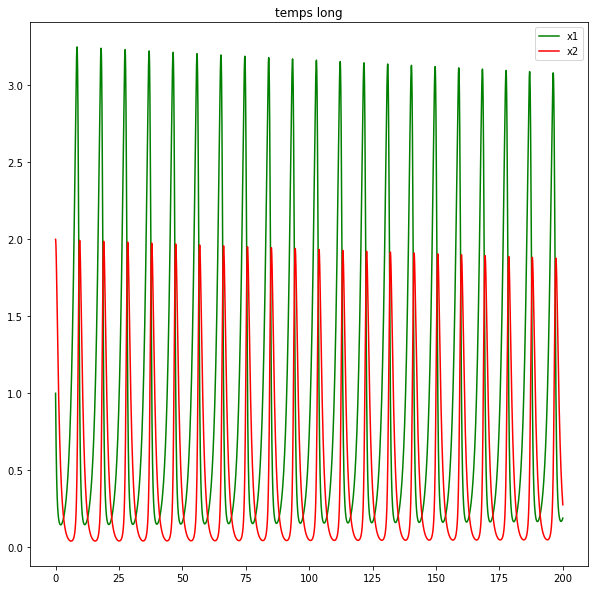

In [76]:
T,X = solve_euler_implicit(f,np.array([1,2]),0.001,0,200)

plt.plot(T,[e[0] for e in X], color = 'green', label = "x1")
plt.plot(T,[e[1] for e in X], color = 'red', label = "x2")
plt.legend()
plt.title("temps long")
plt.plot()

Evolution de H:

[]

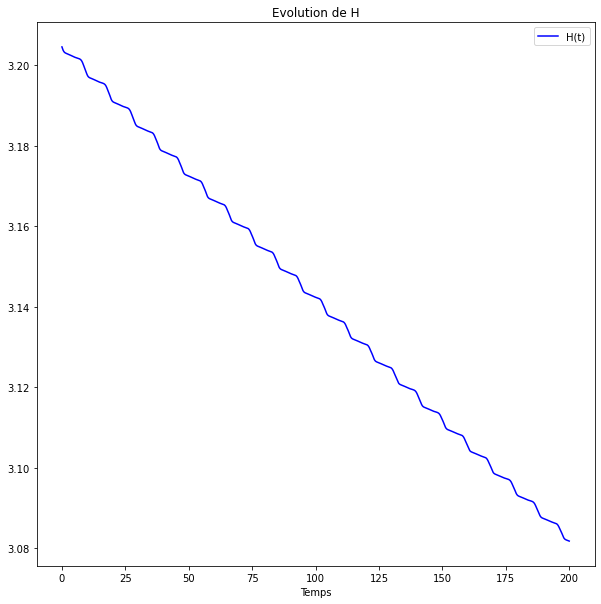

In [77]:
Y = []
for i in range(0,len(T)):
    Y.append(H(X[i][0],X[i][1]))
plt.plot(T,Y, color='b', label = 'H(t)')
plt.legend()
plt.title("Evolution de H")
plt.xlabel("Temps")
plt.plot()

On remarque que cette fois ci, l'amplitude des oscillations des solutions diminue. 

On propose maintenant de modifier ces schémas de façon à stabiliser $H$ et assurer sa conservation le long des solutions numériques.

<br>

## Question 8
Expliquer pourquoi les solutions de
$$
\left\{ \begin{matrix}
\dot{x}_1 &= x_1(\alpha -\beta x_2) - u_1(x_1,x_2) (H(x_1,x_2)-H_0) \\
\dot{x}_2 &= -x_2(\gamma - \delta x_1) - u_2(x_1,x_2) (H(x_1,x_2)-H_0) 
\end{matrix} \right.
$$

sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout choix de $u:\mathbb{R}^2 \to \mathbb{R}^2$.

D'après la question 4, si $x(t)$ est solution du schéma d'équations de Lotka-Volterra, $\forall t, H(x(t)) = H(x_0) = H_0$.

De plus le schéma d'équations différentielles précédent est identique au schéma d'équations de Lotka-Volterra si $\forall i \in${1,2}, $u_i(x_1,x_2)(H(x_1,x_2) - H_0) = 0$. Cette condition est vérifiée $\forall u : \mathbb{R}^2 \to \mathbb{R}^2$ si et seulement si $H(x_1,x_2) = H_0  \forall (x_1,x_2) \in \mathbb{R^2}$, soit si $x$ est une solution de Lotka-Volterra.

Ainsi, si $H_0 = H(x(0))$, les solutions de Lotka-Volterra et du nouveau système identiques quel que soit le choix de $u$.

<br>

## Question 9
Soit $H_0\in \mathbb{R}$. Calculer la dérivée de $H-H_0$ le long des solutions de ce nouveau système. Montrer que l'on peut choisir $u$ tel que
$$
\frac{d }{dt} (H(x(t))-H_0) = -k \| \nabla H(x(t)) \|^2 (H(x(t))-H_0) \ .
$$ 
En déduire qu'alors $H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t$ tend vers l'infini si $x$ reste à une distance strictement positive de $\bar{x}$.

##### 1- Dérivée de $H - H_0$

$ \frac{d}{dt}(H(x(t))-H_0) \ = \delta \dot{x_1} - \gamma \frac{\dot{x_1}}{x_1} + \beta \dot{x_2} - \alpha \frac{\dot{x_2}}{x_2} = \dot{x_1}(\delta - \frac{\gamma}{x_1}) + \dot{x_2}(\beta - \frac{\alpha}{x_2}) =  -[u_1(x_1,x_2)(\delta - \frac{\gamma}{x_1}) + (u_2(x_1,x_2)(\beta - \frac{\alpha}{x_2})]*[H(x_1,x_2) - H_0]$

Or, $\nabla H(x(t)) = \begin{pmatrix} \delta - \frac{\gamma}{x_1} \\ \beta - \frac{\alpha}{x_2} \end{pmatrix}$ et $\|\nabla H(x(t))\|^2 = (\delta - \frac{\gamma}{x_1})^2 + (\beta - \frac{\alpha}{x_2})^2$.

En posant $u(x_1,x_2) = k\nabla H(x_1x_2)$ on obtient :

$\frac{d}{dt}(H(x(t))-H_0) = -k\|\nabla H(x(t))\|^2(H(x(t)) - H_0)$.

##### 2- Convergence exponentielle de $H$

Supposons que $x$ reste à une distance positive de $\bar{x}$, alors pour tout $t$, $x(t) \ne (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ donc $\nabla H(x_1,x_2) = (\delta - \frac{\gamma}{x_1},\alpha - \frac{\beta}{x_2}) \ne (0,0)$ donc $\exists C >0$ tq $0 < ||\nabla H(x)||^2 < C$.

On note : $\theta : t \to ||\nabla H(x(t))||^2$. Ainsi, $H\circ x-H_0$ est solution de l'équation différentielle $\dot{y} = -k\theta y$ donc  $\forall t$ $H(x(t)) -H_0 = Ae^{-k\int_{t_0}^{t} \theta(s)\mathrm{d} s}$ où $A \in \mathbb{R}$.

Ainsi comme $\theta$ est positive et minorée par $C$ : $|H(x(t))-H_0|=|A|e^{-k\int_{t_0}^{t} \theta(s)\mathrm{d} s} \leq |A|e^{-kC(t-t_0)}$

En conclusion, $H$ tend exponentiellement vers $H_0$.

## Question 10
En déduire comment modifier l'implémentation du schéma d'Euler pour assurer la stabilité de $H$. Quel est le rôle de $k$ ? Peut-il être choisi arbitrairement grand ? Pourquoi ?

K est le facteur responsable de la vitesse de convergence de H vers H_{}. Plus k est grand et plus la solution converge rapidement.

Il ne peut cependant pas être choisi arbitrairement grand, car la correction pourrait alors être trop forte par rapport au pas de temps, ce qui rendrait la méthode d'Euler inefficace :

$\forall j, H(x_{j+1}) - H_{0} =  H(x_{j}) - H_{0} + dt(-k)(||\nabla H(x_{j})||)^2(H(x_{j+1}) - H_{0})
H(x_{j+1}) - H_{0} = (H(x_{j+1}) - H_{0})(1-kdt(||\nabla H(x_{j})||)^2)$

Oron sait que $(||\nabla H(x_{j})||)^2$ est borné d'après les questions précédentes. En considéran ses bornes, on retrouve une suite géométrique de raison $(1-kdt(||\nabla H(x_{j})||)^2)$.

Or pour que la solution converge bien, il faut $|(1-kdt(||\nabla H(x_{j})||)^2)|<1$. C'est-à-dire lorsque $0<k<\fract{2}{dt(||\nabla H(x_{j})||)^2$
          
